In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # painting 3d models

In [5]:
houses = pd.read_csv('1.4_houses.csv')

In [6]:
houses.head(7)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


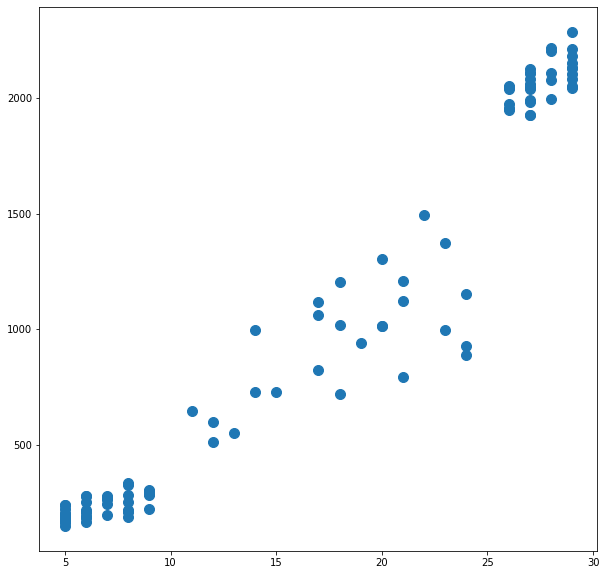

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(houses['dim_1'], houses['price'], s=100)

plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X = houses[['dim_1']]
y = houses['price']

reg = LinearRegression().fit(X, y)

In [22]:
# price = price(dim_1) = a * dim_1 + b | a + b * dim_1

[b] = reg.coef_ # коэффициент регрессии
a = reg.intercept_ 

In [23]:
def reg_prediction(dim_1):
    return a + b * dim_1

In [24]:
reg_prediction(X.dim_1[0])

2057.887633711507

In [27]:
print(reg.predict(X[0:10]))

[2057.88763371 1974.79893262  146.84750868   63.75880759  146.84750868
   63.75880759 1891.71023154 1559.35542718  396.11361195 2057.88763371]


In [33]:
X = houses[['dim_1', 'dim_2']]
y = houses['price']

reg = LinearRegression().fit(X, y)

In [36]:
[b1, b2] = reg.coef_
a = reg.intercept_

def reg_predict(dim_1, dim_2):
    return a + b1 * dim_1 + b2 * dim_2

In [37]:
reg_predict(X.dim_1[0], X.dim_2[0])

2080.82359179565

### classification

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [39]:
X = houses[['dim_1', 'dim_2']]
y = houses['level']

cl = DecisionTreeClassifier().fit(X, y)

In [40]:
print(export_text(cl))

|--- feature_0 <= 10.00
|   |--- class: basic
|--- feature_0 >  10.00
|   |--- feature_0 <= 25.00
|   |   |--- class: medium
|   |--- feature_0 >  25.00
|   |   |--- class: luxury



In [45]:
cl.predict(X[0:1])[0], y[0]

('luxury', 'luxury')

### clasterization

In [46]:
from sklearn.cluster import KMeans

In [48]:
X = houses[['dim_1', 'dim_2']]

clust = KMeans(n_clusters=3).fit(X)

In [49]:
clust.cluster_centers_

array([[ 6.76744186,  7.1627907 ],
       [27.42424242, 27.51515152],
       [18.5       , 16.45833333]])

### Neaural nets and enscembles